In [1]:
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import numpy as np

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns
gene_names = Y.columns

# List of columns for iterating
columns = list(Y)

In [2]:
# IF SINGLE TEST WORKS THEN ITERATE
r2_list = []

for i in columns:
    
    # resetting the r2 and best model value for each column
    r2 = 0
    best_model = linear_model.Lasso()
    
    # Iterate through common proportions of test/train data
    for j in [0.2, 0.4, 0.6, 0.8]:

        # Split Data
        x_train, x_test, y_train, y_test = train_test_split(X, Y[i], test_size=j) 

        # Iterate through common max_iter
        for k in [100000, 1000000, 10000000]:

            # Create model
            xg = linear_model.Lasso(max_iter=k)
            xg = xg.fit(x_train, y_train)

            # Find model r squared
            predictions = xg.predict(x_test)
            new_r2 = abs(r2_score(y_test, predictions)) # using absolute value for comparision

            # Compare model, if model r2 is over 1 then its very bad fit so we don't save it
            if new_r2 <= 1:
                if new_r2 > r2:
                    r2 = new_r2
                    # Saving the better model
                    best_model = xg
                    # Saving best model params for visualization
                    best_x_test = x_test
                    best_y_test = y_test
    
    # Storing highest r2
    r2_list.append(r2)
    # Printing r2
    print(f"{i} r2: {r2}")
    
    if r2 != 0: # if a best model exists
        # Finally dumping the best model for the class
        joblib.dump(best_model, f"Models/lasso_{i}.joblib")
    
        # Visualizing feature importance
        perm_importance = permutation_importance(best_model, best_x_test, best_y_test)
        sorted_idx = perm_importance.importances_mean.argsort()
        plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
        plt.gcf().set_size_inches(10, 7)
        plt.xlabel(f"{i} Permutation Importance")
        plt.savefig(f'Features/{i}_features.png')
        plt.close()

Lipopeptides r2: 0.5879004219641961
Arsenic_resistance r2: 0.31009662697279494
Copper_resistance r2: 0.5482917515197376
Rifampin r2: 0.13329682684917832
Trimethoprim r2: 0.6678028678469314
Tellurim_resistance r2: 0.32145428253665953
Zinc_resistance r2: 0.4207094843977266
Peroxide_resistance r2: 0.40966412365919247
Multi-drug_resistance r2: 0.4258757508651465
Acid_resistance r2: 0.22281442628456394
Phenolic_compound_resistance r2: 0.3991316598181145


/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+

Mupirocin r2: 0.025000000000000133
Nucleosides r2: 0.1223844920095507
Aldehyde_resistance r2: 0.3629740483433974
Paraquat_resistance r2: 0.6475230465674773
Betalactams r2: 0.4687700429526973
Tetracyclines r2: 0.7286478270943633
Nickel_resistance r2: 0.261283191321516
Multibiocide_resistance r2: 0.23766015499469328
Aminoglycoside r2: 0.7562165974158135
MLS r2: 0.7867959344464963
Fluoroquinolones r2: 0.5925760515451497
Fosfomycin r2: 0.4985904730345325
Phenicol_resistance r2: 0.9519258353386744
Drug_and_biocide_resistance r2: 0.7712293254646152
Multimetal_resistance r2: 0.8856351417214761
Mercury_resistance r2: 0.8439327544161568
Glycopeptides r2: 0.06734468443332675
Sulfonamides r2: 0.7932233959064143
Drug_and_biocide_and_metal_resistance r2: 0.12957251110713652
Cationic_microbial_peptides r2: 0.9059288144652484
Biocide_and_metal_resistance r2: 0.25018434376557497
Iron_resistance r2: 0.8585046036450052
Biguanide_resistance r2: 0.0698501752183609
Metronidazole r2: 0.1547313122353453
Acet

/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+

Bacitracin r2: 0.016719163463880582
Sodium_resistance r2: 0.4229591471042631


/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/mour/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+

Chromium_resistance r2: 0.024929217595469844
QACS r2: 0.2862037125413419


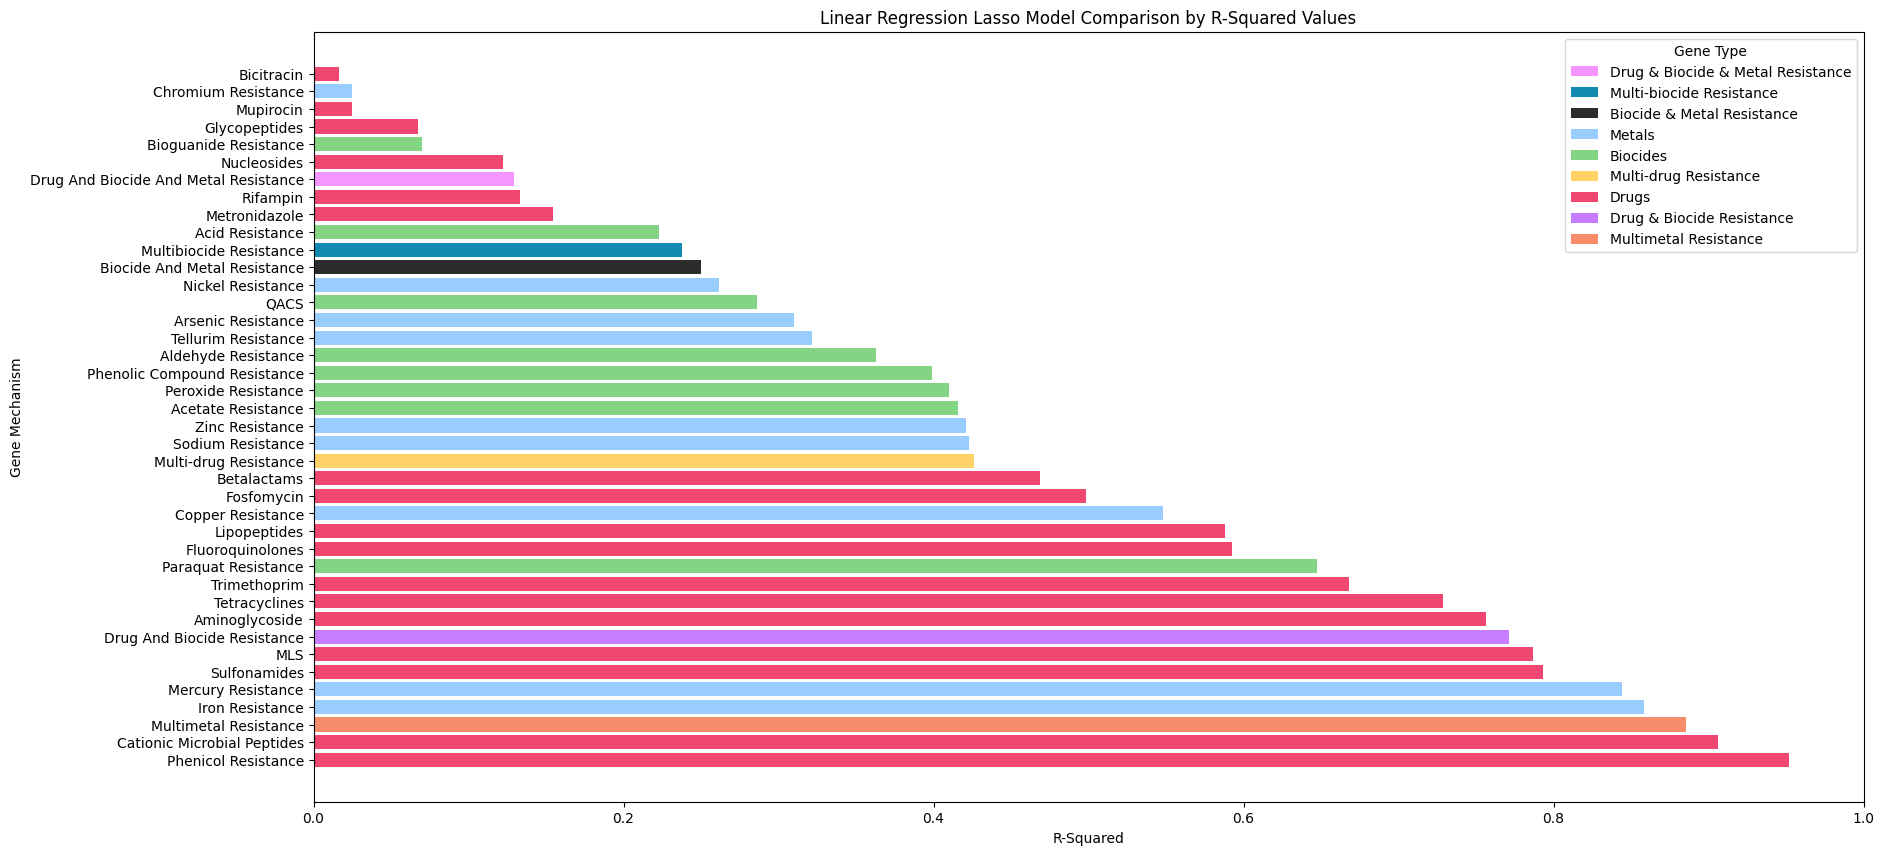

Figure 1: Lasso model comparison for 40 gene mechanism frequency prediction models. Models are compared via the absolute values of their r-squared values displayed on the x-axis and sorted from least to greatest. The Y-axis labels the gene mechanisms that each model is predicting the frequency of. Models are additionally color-coded by gene type, which is displayed in the legend.


In [3]:
# Plotting an overall comparision of different gene models and their r2 scores
# Order and compare the accuracy of models depending on drug/metal/biociode/multicompound types etc
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))

# Sorting r2 values for visualization
sorted_idx = np.argsort(r2_list)
r2_array = np.array(r2_list)

# Sorting colors for visualization
bar_labels = ['Drugs', 'Metals', '_Metals', '_Drugs', '_Drugs', '_Metals', '_Metals', 'Biocides', 'Multi-drug Resistance', '_Biocides', '_Biocides', '_Drugs', '_Drugs', '_Biocides', '_Biocides', '_Drugs', '_Drugs', '_Metals', 'Multi-biocide Resistance', '_Drugs', '_Drugs', '_Drugs', '_Drugs', '_Drugs', 'Drug & Biocide Resistance', 'Multimetal Resistance', '_Metals', '_Drugs', '_Drugs', 'Drug & Biocide & Metal Resistance', '_Drugs', 'Biocide & Metal Resistance', '_Metals', '_Biocides', '_Drugs', '_Biocides', '_Drugs', '_Metals', '_Metals', '_Biocides']
formatted_genes = ['Lipopeptides', 'Arsenic Resistance', 'Copper Resistance', 'Rifampin',
       'Trimethoprim', 'Tellurim Resistance', 'Zinc Resistance',
       'Peroxide Resistance', 'Multi-drug Resistance', 'Acid Resistance',
       'Phenolic Compound Resistance', 'Mupirocin', 'Nucleosides',
       'Aldehyde Resistance', 'Paraquat Resistance', 'Betalactams',
       'Tetracyclines', 'Nickel Resistance', 'Multibiocide Resistance',
       'Aminoglycoside', 'MLS', 'Fluoroquinolones', 'Fosfomycin',
       'Phenicol Resistance', 'Drug And Biocide Resistance',
       'Multimetal Resistance', 'Mercury Resistance', 'Glycopeptides',
       'Sulfonamides', 'Drug And Biocide And Metal Resistance',
       'Cationic Microbial Peptides', 'Biocide And Metal Resistance',
       'Iron Resistance', 'Bioguanide Resistance', 'Metronidazole',
       'Acetate Resistance', 'Bicitracin', 'Sodium Resistance',
       'Chromium Resistance', 'QACS']
formatted_genes = np.array(formatted_genes)

drug_color = '#ef476f'
metal_color = '#99ccff'
biocide_color = '#83d483'
multi_drug_color = '#ffd166'
multi_metal_color = '#f78c6b'
multi_biocide_color = '#118ab2'
drug_biocide_color = '#c77dff'
drug_biocide_metal_color = "#f695ff"
metal_biocide_color = "#2C2C2C"

bar_colors = [f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{drug_color}', f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{biocide_color}', f'{multi_drug_color}', f'{biocide_color}', f'{biocide_color}', f'{drug_color}', f'{drug_color}', f'{biocide_color}', f'{biocide_color}', f'{drug_color}', f'{drug_color}', f'{metal_color}', f'{multi_biocide_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_biocide_color}', f'{multi_metal_color}', f'{metal_color}', f'{drug_color}', f'{drug_color}', f'{drug_biocide_metal_color}', f'{drug_color}', f'{metal_biocide_color}', f'{metal_color}', f'{biocide_color}', f'{drug_color}', f'{biocide_color}', f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{biocide_color}']
# [f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{biocide_color}', f'tab:{multi_drug_color}', f'tab:{biocide_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{biocide_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{multi_biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_biocide_color}', f'tab:{multi_metal_color}', f'tab:{metal_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_biocide_metal_color}', f'tab:{drug_color}', f'tab:{metal_biocide_color}', f'tab:{metal_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{biocide_color}']

# Plotting graph
ax.barh(formatted_genes[sorted_idx], r2_array[sorted_idx], align='center', label=np.array(bar_labels)[sorted_idx], color=np.array(bar_colors)[sorted_idx])
# ax.barh(np.arange(len(columns)), r2_list, align='center') # old code
ax.set_yticks(np.arange(len(columns)), labels=formatted_genes[sorted_idx])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('R-Squared')
ax.set_ylabel('Gene Mechanism')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_title('Linear Regression Lasso Model Comparison by R-Squared Values')
ax.legend(title='Gene Type')

plt.savefig(f'lasso_r2_graph.png')
plt.show()

print("Figure 1: Lasso model comparison for 40 gene mechanism frequency prediction models. Models are compared via the absolute values of their r-squared values displayed on the x-axis and sorted from least to greatest. The Y-axis labels the gene mechanisms that each model is predicting the frequency of. Models are additionally color-coded by gene type, which is displayed in the legend.")